In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [63]:
fields = pd.read_csv('fields.csv', decimal=',', sep=';', na_values='', encoding='cp1251')
works = pd.read_csv('works.csv', decimal=',', sep=';', encoding='cp1251')
value = pd.read_csv('value.csv', decimal=',', sep=';', na_values='', encoding='cp1251')

In [64]:
#fields = fields.drop(columns = ['Unnamed: 18'])
fields = fields.drop_duplicates()
# works = works.drop(columns = ['main_tech', 'add_tech', 'mech'])

In [65]:
fields['id'] = fields['season'].map(str)+' '+fields['field'].map(str)
works['id'] = works['season'].map(str)+' '+works['field'].map(str)

In [67]:
print(list(works['main_tech']).count('Арендованная техника'))
print(len(works))

10514
174683


In [68]:
works.isna().sum()

season                0
field                 0
work_type             0
work_subtype          0
start_date            0
end_date           9004
area                  0
main_tech             0
add_tech          48540
mech                  0
proc_depth       132562
prod_purpose     140822
prod_weight           0
prod_dry_perc    161715
prod_humid       151128
prod_impur       151128
yield_fact            0
work_id               0
id                    0
dtype: int64

In [69]:
set(works['work_type'])

{'Внесение СЗР', 'Внесение удобрений', 'Обработка почвы', 'Сев', 'Уборка'}

In [70]:
merged_works = works.merge(fields, on='id', how='left')
merged_works

,season_x,field_x,work_type,work_subtype,start_date,end_date,area_x,main_tech,add_tech,mech,...,area_y,hybrid,reproduction,seed_origin,technology,yield_plan,p2o5,k2o,humus,ph
0,2023,16.13.12.044.00,Обработка почвы,Боронование,29.04.2022,30.04.2022,"49,78","Трактор колесный Fendt 936 Vario, гос.ном. 050...",Арендованная техника,Ахметсафин Айрат Рафикович,...,49.78,Кинельская 100,NaN,NaN,NaN,1.24,197.67,192.33,6.00,5.63
1,2023,16.13.12.017.00,Обработка почвы,Боронование,01.05.2022,02.05.2022,"154,76","Трактор колесный Птз К-744Р4, гос.ном. 2251АА1...","Борона зубовая Veles АГС-22-2У.М, зав.ном. 789",Ямалетдинов Фарид Расыхович,...,235.76,Девятка,РС-1,Покупные,NaN,1.53,211.50,196.42,8.00,6.13
2,2023,16.13.12.012.00,Обработка почвы,Боронование,02.05.2022,03.05.2022,"40,62","Трактор колесный Fendt 936 Vario, гос.ном. 050...",Арендованная техника,Мухаметзянов Ринат Айратович,...,126.62,Сузука,F1,Покупные,классическая с плугом,1.70,225.00,196.67,7.80,6.67
3,2023,16.13.12.012.00,Обработка почвы,Боронование,02.05.2022,03.05.2022,"86,00","Трактор колесный Птз К-744Р4, гос.ном. 2251АА1...","Борона зубовая Veles АГС-22-2У.М, зав.ном. 789",Шакиров Ринат Галиевич,...,126.62,Сузука,F1,Покупные,классическая с плугом,1.70,225.00,196.67,7.80,6.67
4,2023,16.13.12.017.00,Обработка почвы,Боронование,02.05.2022,03.05.2022,"76,00","Трактор колесный Птз К-744Р4, гос.ном. 2251АА1...","Борона зубовая Veles АГС-22-2У.М, зав.ном. 789",Шакиров Ринат Галиевич,...,235.76,Девятка,РС-1,Покупные,NaN,1.53,211.50,196.42,8.00,6.13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174678,2024,54.17.12.029.00,Уборка,Подбор (корм),27.10.2024,27.10.2024,"27,00","Комбайн кормоуборочный Ростсельмаш F2650, гос....",NaN,Ульвачев Алексей Николаевич,...,162.17,БН 06-18,NaN,Покупные,минимальная,4.10,219.20,116.90,7.30,4.60
174679,2024,54.28.13.038.00,Уборка,Вывоз,27.10.2024,27.10.2024,"7,00","Трактор колесный Lovol 2604, зав.ном. M700060R...",Арендованная техника,Лагунов Юрий Николаевич,...,314.32,Скипетр,РС-1,Покупные,минимальная,4.00,196.60,111.00,5.70,5.20
174680,2024,54.28.07.028.00,Обработка почвы,Культивация,28.10.2024,28.10.2024,"3,14","Трактор колесный John Deere 8370R, гос.ном. 49...","Культиватор стерневой Vaderstad TopDown 500, з...",Гопаненко Владимир Владимирович,...,177.14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
174681,2024,54.28.07.028.00,Обработка почвы,Культивация,28.10.2024,28.10.2024,"6,00","Трактор колесный John Deere 9470R, гос.ном. 48...","Культиватор стерневой Vaderstad TopDown 700, и...",Гамануха Дмитрий Владимирович,...,177.14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Добавлю столбец процентного выполнения плана урожайности

In [83]:
merged_works = merged_works[merged_works['yield_plan'] > 0]
dt = merged_works['yield_plan'].quantile(0.99)
merged_works = merged_works[merged_works['yield_plan'] < dt]
dt = merged_works['yield_fact'].quantile(0.99)
merged_works = merged_works[merged_works['yield_fact'] < dt]
merged_works['yield_otn'] = merged_works.dropna(subset=['yield_plan', 'yield_fact']).apply(lambda x: round(x.yield_fact / x.yield_plan, 2) * 100, axis=1)
merged_works.head()

,season_x,field_x,work_type,work_subtype,start_date,end_date,area_x,main_tech,add_tech,mech,...,hybrid,reproduction,seed_origin,technology,yield_plan,p2o5,k2o,humus,ph,yield_otn
0,2023,16.13.12.044.00,Обработка почвы,Боронование,29.04.2022,30.04.2022,"49,78","Трактор колесный Fendt 936 Vario, гос.ном. 050...",Арендованная техника,Ахметсафин Айрат Рафикович,...,Кинельская 100,NaN,NaN,NaN,1.24,197.67,192.33,6.0,5.63,0.0
1,2023,16.13.12.017.00,Обработка почвы,Боронование,01.05.2022,02.05.2022,"154,76","Трактор колесный Птз К-744Р4, гос.ном. 2251АА1...","Борона зубовая Veles АГС-22-2У.М, зав.ном. 789",Ямалетдинов Фарид Расыхович,...,Девятка,РС-1,Покупные,NaN,1.53,211.50,196.42,8.0,6.13,0.0
2,2023,16.13.12.012.00,Обработка почвы,Боронование,02.05.2022,03.05.2022,"40,62","Трактор колесный Fendt 936 Vario, гос.ном. 050...",Арендованная техника,Мухаметзянов Ринат Айратович,...,Сузука,F1,Покупные,классическая с плугом,1.70,225.00,196.67,7.8,6.67,0.0
3,2023,16.13.12.012.00,Обработка почвы,Боронование,02.05.2022,03.05.2022,"86,00","Трактор колесный Птз К-744Р4, гос.ном. 2251АА1...","Борона зубовая Veles АГС-22-2У.М, зав.ном. 789",Шакиров Ринат Галиевич,...,Сузука,F1,Покупные,классическая с плугом,1.70,225.00,196.67,7.8,6.67,0.0
4,2023,16.13.12.017.00,Обработка почвы,Боронование,02.05.2022,03.05.2022,"76,00","Трактор колесный Птз К-744Р4, гос.ном. 2251АА1...","Борона зубовая Veles АГС-22-2У.М, зав.ном. 789",Шакиров Ринат Галиевич,...,Девятка,РС-1,Покупные,NaN,1.53,211.50,196.42,8.0,6.13,0.0


In [84]:
df_arend = merged_works[merged_works['main_tech']=='Арендованная техника'].dropna(subset=['yield_plan', 'yield_fact'])

In [85]:
df_noarend = merged_works[merged_works['main_tech']!='Арендованная техника'].dropna(subset=['yield_plan', 'yield_fact'])

In [74]:
order = df_noarend["work_type"].value_counts().index.to_list()
sns.countplot(df_noarend['work_type'], order=order)

ValueError: Input data must be a pandas object to reorder

<Axes: xlabel='count', ylabel='work_type'>

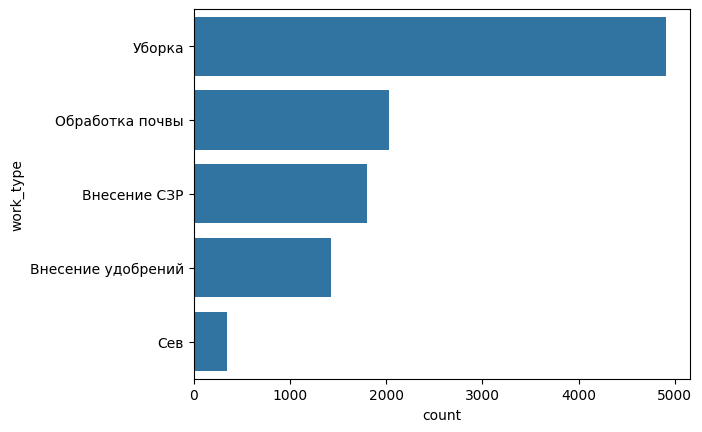

In [ ]:
order = df_arend["work_type"].value_counts().index.to_list()
sns.countplot(df_arend['work_type'], order=order)

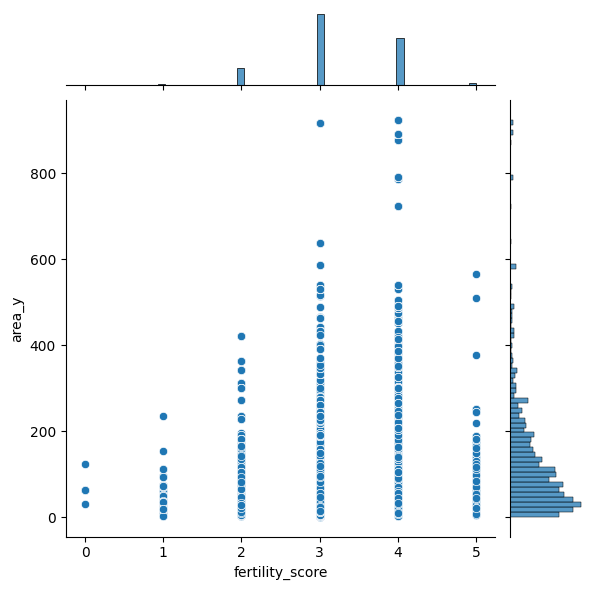

In [ ]:
x = 'fertility_score'
y = 'area_y'
sns.jointplot(x = x, y = y, data=df_arend.replace({y: 0}, np.nan))

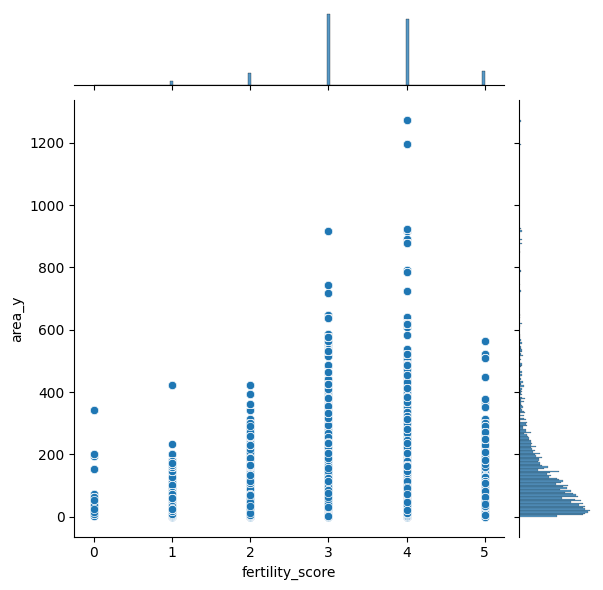

In [ ]:
x = 'fertility_score'
y = 'area_y'
sns.jointplot(x = x, y = y, data=df_noarend.replace({y: 0}, np.nan))

In [86]:
s = 0
sc = 0
for i in df_arend.index:
    a = float('.'.join(df_arend['area_x'][i].split(',')))
    b = df_arend['area_y'][i]
    if str(a)!='nan' and str(b)!='nan':
        s+=a/b
        sc+=1
s/len(df_arend)

0.5109566737247618

In [87]:
s = 0
sc = 0
for i in df_noarend.index:
    a = float('.'.join(df_noarend['area_x'][i].split(',')))
    b = df_noarend['area_y'][i]
    if str(a)!='nan' and str(b)!='nan':
        s+=a/b
        sc+=1
s/len(df_noarend)

0.48144127515113644

In [88]:
df_arend[['proc_depth', 'yield_plan', 'p2o5', 'k2o', 'humus', 'ph', 'fertility_score']].mean()

proc_depth          14.620199
yield_plan           4.388774
p2o5               141.896869
k2o                139.846096
humus                4.814225
ph                   5.615164
fertility_score      3.264153
dtype: float64

In [89]:
df_noarend[['proc_depth', 'yield_plan', 'p2o5', 'k2o', 'humus', 'ph', 'fertility_score']].mean()

proc_depth          12.589300
yield_plan           4.829767
p2o5               127.111899
k2o                133.221570
humus                4.845331
ph                   5.553101
fertility_score      3.459607
dtype: float64

In [90]:
merged_works.describe().T

,count,mean,std,min,25%,50%,75%,max
season_x,155400.0,2023.500573,0.500001,2023.00,2023.00,2024.00,2024.00,2024.00
proc_depth,34834.0,12.671273,40.188061,0.01,5.00,10.00,20.00,7323.00
prod_weight,155400.0,49.939389,8879.903095,0.00,0.00,0.00,0.00,3500000.00
prod_dry_perc,11758.0,41.050931,25.100121,0.00,32.00,36.40,41.00,1655.82
prod_humid,22246.0,15.459039,96.283064,0.00,12.00,14.00,16.50,14172.00
prod_impur,22246.0,4.320379,5.886650,0.00,2.00,3.00,5.00,230.00
yield_fact,155400.0,664.775418,1761.850352,0.00,0.00,0.00,0.00,19870.00
fertility_score,150321.0,3.448054,0.828159,0.00,3.00,3.00,4.00,5.00
season_y,155400.0,2023.500573,0.500001,2023.00,2023.00,2024.00,2024.00,2024.00
crop_yearold,27671.0,2.521846,1.593792,0.00,1.00,2.00,3.00,11.00


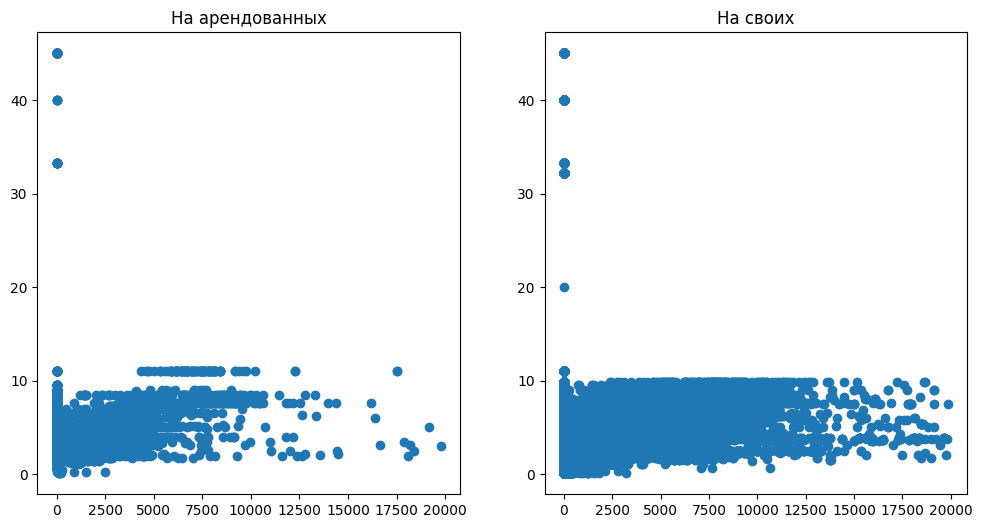

In [91]:
f, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].scatter(x=df_arend['yield_fact'], y=df_arend['yield_plan'])
ax[1].scatter(x=df_noarend['yield_fact'], y=df_noarend['yield_plan'])
ax[0].set_title('На арендованных')
ax[1].set_title('На своих')
plt.show()


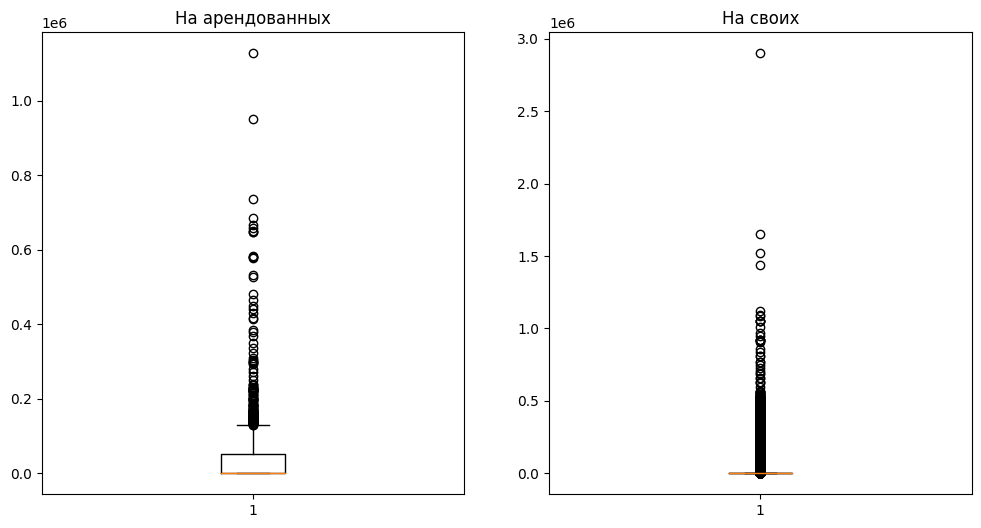

In [92]:
f, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].boxplot(df_arend['yield_otn'])
ax[1].boxplot(df_noarend['yield_otn'])
ax[0].set_title('На арендованных')
ax[1].set_title('На своих')
plt.show()

In [93]:
maxx = df_arend['yield_otn'].quantile(0.99)
df_arend= df_arend[df_arend['yield_otn'] < maxx]
maxx = df_noarend['yield_otn'].quantile(0.99)
df_noarend = df_noarend[df_noarend['yield_otn'] < maxx]

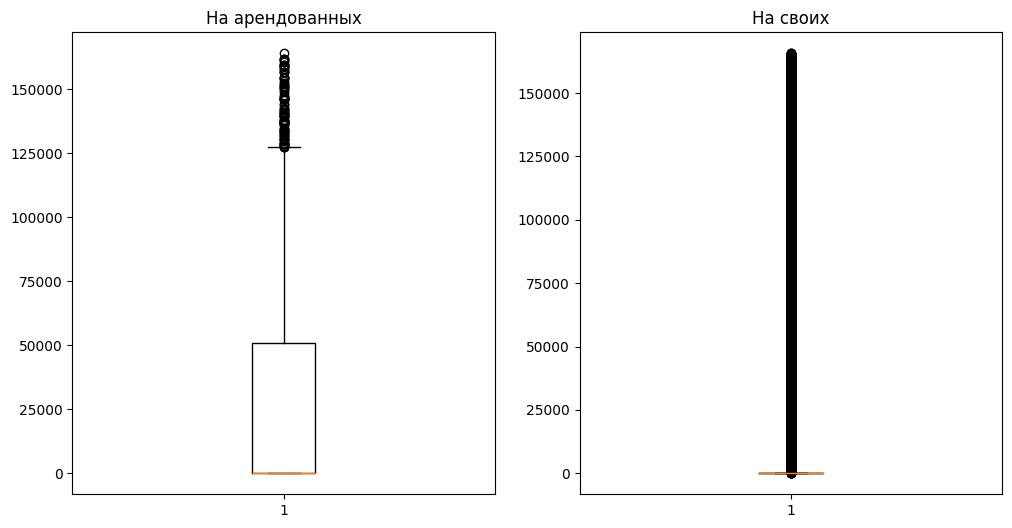

In [94]:
f, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].boxplot(df_arend['yield_otn'])
ax[1].boxplot(df_noarend['yield_otn'])
ax[0].set_title('На арендованных')
ax[1].set_title('На своих')
plt.show()

In [ ]:
from scipy.stats import kstest, ttest_ind, levene

In [ ]:
kstest(df_arend['yield_otn'], 'norm'), kstest(df_noarend['yield_otn'], 'norm')

(KstestResult(statistic=0.5, pvalue=0.0),
 KstestResult(statistic=0.5, pvalue=0.0))

Нулевая гипотеза: процентное выполнение собранного урожая равно при арендованных и неарендованных машинах на работах

In [ ]:
stat, p_var = levene(df_arend['yield_otn'], df_noarend['yield_otn'])
if p_var < 0.05:
    # Если p-value < alpha, то дисперсии различаются
    equal_var = False
    print("Дисперсии различаются.")
else:
    equal_var = True
    print("Дисперсии равны.")
t_stat, p_value = ttest_ind(df_arend['yield_otn'], df_noarend['yield_otn'], equal_var=equal_var)

if p_value < 0.05: conclusion = "Отвергаем нулевую гипотезу: Средние значения различаются."
else: conclusion = "Не удается отвергнуть нулевую гипотезу: Средние значения не различаются."
print(f"T-statistic: {t_stat:.4f}, p-value: {p_value:.4f}")
print(conclusion)

Дисперсии различаются.
T-statistic: 5.9766, p-value: 0.0000
Отвергаем нулевую гипотезу: Средние значения различаются.


In [ ]:
df_arend['yield_otn'].mean()

135.75584

In [ ]:
df_noarend['yield_otn'].mean()

15.312909232488066

In [ ]:
df_noarend['yield_otn'].describe()

count    147685.000000
mean         15.312909
std          39.523732
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         487.000000
Name: yield_otn, dtype: float64

In [ ]:
df_arend['yield_otn'].describe()


count     9375.000000
mean       135.755840
std       1951.222272
min          0.000000
25%          0.000000
50%          0.000000
75%         53.000000
max      47026.000000
Name: yield_otn, dtype: float64